# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [3]:
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
df = pd.read_csv("OnlineRetail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<h2> Task 2: Clean Data </h2>

In [5]:
df.dropna(inplace = True)
df["CustomerID"] = df["CustomerID"].astype("int")
df["InvoiceNo"] = df['InvoiceNo'].astype("str")
df["StockCode"] = df["StockCode"].astype("str")
df["Description"] = df["Description"].astype("str")
df["Country"] = df["Country"].astype("str")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df['day'] = df["InvoiceDate"].dt.day
df['month'] = df["InvoiceDate"].dt.month
df['year'] = df["InvoiceDate"].dt.year
df['hour'] = df["InvoiceDate"].dt.hour
df['weekday'] = df["InvoiceDate"].dt.day_name()
df["Value"] = abs(df["Quantity"] * df["UnitPrice"])

<h2>Task 3: Basic Statistics</h2>

<h3>Breaking the Data into Sales and Returns</h3>
<p>Here the data set is broken up into sales (positive quantities) and returns (negative quantities).</p>

In [6]:
#create sales and returns data
sales = df.loc[df["Quantity"] > 0]
returns = df.loc[df["Quantity"] < 0]
returns["Quantity"] = abs(returns["Quantity"])

C:\Users\smstewart1\AppData\Local\Temp\ipykernel_48304\2479525043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns["Quantity"] = abs(returns["Quantity"])


In [21]:
sales.describe()

,Quantity,UnitPrice,CustomerID,day,month,year,hour,Value
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,15.042181,7.612537,2010.934259,12.728247,22.394749
std,180.420210,22.096788,1713.169877,8.653771,3.416527,0.247829,2.273535,309.055588
min,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000,6.000000,0.000000
25%,2.000000,1.250000,13969.000000,7.000000,5.000000,2011.000000,11.000000,4.680000
50%,6.000000,1.950000,15159.000000,15.000000,8.000000,2011.000000,13.000000,11.800000
75%,12.000000,3.750000,16795.000000,22.000000,11.000000,2011.000000,14.000000,19.800000
max,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000,20.000000,168469.600000


In [22]:
returns.describe()

,Quantity,UnitPrice,CustomerID,day,month,year,hour,Value
count,8905.000000,8905.000000,8905.000000,8905.000000,8905.00000,8905.000000,8905.000000,8905.000000
mean,30.859966,18.845519,14991.667266,14.765637,7.31151,2010.922515,13.149691,68.651554
std,1170.154939,444.366043,1706.772357,8.648067,3.51281,0.267374,2.715457,2019.177682
min,1.000000,0.010000,12346.000000,1.000000,1.00000,2010.000000,6.000000,0.120000
25%,1.000000,1.450000,13510.000000,7.000000,4.00000,2011.000000,11.000000,3.300000
50%,2.000000,2.950000,14895.000000,14.000000,8.00000,2011.000000,13.000000,8.500000
75%,6.000000,4.950000,16393.000000,22.000000,10.00000,2011.000000,15.000000,17.000000
max,80995.000000,38970.000000,18282.000000,31.000000,12.00000,2011.000000,20.000000,168469.600000


<H2> Tasks 4 and 5: Exploratory Data Analysis </h2>

In [8]:
#Useful Functions
#generate scatter plots
def myplotter_scat(x, y, xlab, ylab, title):
    plt.scatter(x, y, edgecolor = "black")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()
    plt.clf
    return 

#generate bar plots
def myplotter_bar(xval, yval, xlab, ylab, title, xl, xh):
    plt.bar(xval, height = yval, edgecolor = "black", color = "blue")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.xlim(xl, xh)
    plt.show()
    plt.clf
    return 

#generate row plots
def myplotter_row(x, y, xlab, ylab, title, xl, xh):
    plt.barh(x, y, edgecolor = "black", color = "blue")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.xlim(xl, xh)
    plt.show()
    plt.clf
    return 

#whisker plots
def myplotter_box(data, ylab, titlelab):
    plt.boxplot(data)
    plt.ylabel(ylab)
    plt.title(titlelab)
    return

#double bars
def myplotter_db(xb, y1, y2, xlab, ylab, titley1, titley2, xl, xh, yl, yh):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
    ax1.bar(xb, y1)
    ax1.set_xlim(xl, xh)
    ax1.set_ylim(yl, yh)
    ax1.tick_params(axis = 'x', rotation = 90)
    ax1.set_title(titley1)
    ax1.set_ylabel(ylab)
    ax1.set_xlabel(xlab)
    ax2.bar(xb, y2)
    ax2.set_xlim(xl, xh)
    ax2.tick_params(axis = 'x', rotation = 90)
    ax2.set_title(titley2)
    ax2.set_ylabel(ylab)
    ax2.set_xlabel(xlab)
    ax2.set_ylim(yl, yh)
    plt.show()
    plt.clf
    return

<h3> Distribution of Sales </h3>
<p>In this first plot, the majority of sales and returns are typically involving less than 5,000 units of items.  While there are some high volume transactions, these are generally very rare and a bulk of transactions are only small transactions.  The same is also true of returns, shownin the plot below</p>

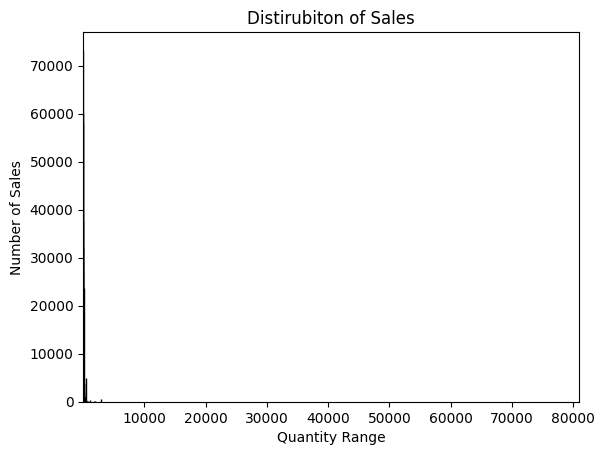

In [24]:
#Distributions of Sales
myplotter_bar(sales["Quantity"].unique(), sales.groupby(["Quantity"])["Quantity"].count(), "Quantity Range", "Number of Sales", "Distirubiton of Sales", 1, max(sales["Quantity"].unique()) )

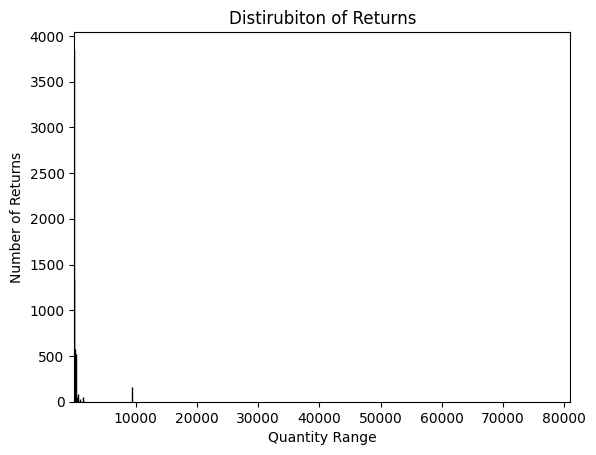

In [10]:
#Distribution of Returns
myplotter_bar(returns["Quantity"].unique(), returns.groupby(["Quantity"])["Quantity"].count(), "Quantity Range", "Number of Returns", "Distirubiton of Returns", 1, max(returns["Quantity"].unique()))

<h3>Total Unit Sales by Month</h3>
<p>In terms of to total units sold, the majority of units are purchased between October through December, with sales reaching a low in the February to April range.  In contrast, returns peak in December and January, and the total number of units returns throughoutout the year is typically less than 5% of the units sold except for the peak months. </p>

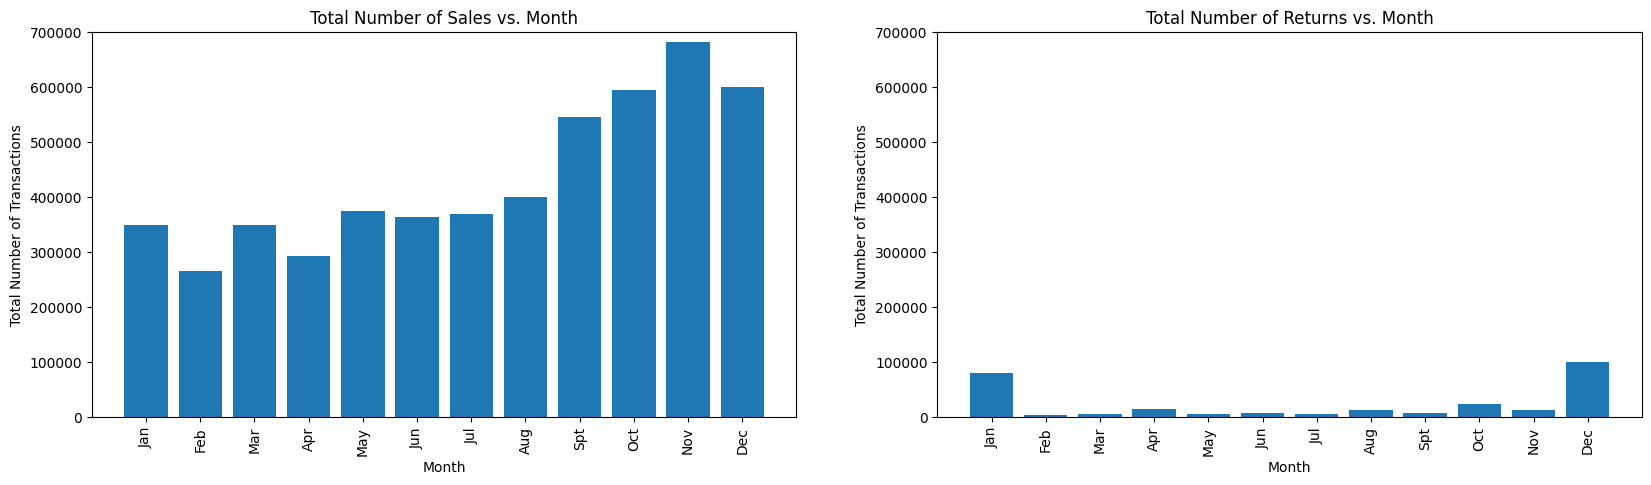

In [24]:
#Total Unit Sales by months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Spt", "Oct", "Nov", "Dec"]
myplotter_db(months, sales.groupby(["month"])["Quantity"].sum(), returns.groupby(["month"])["Quantity"].sum(), "Month", "Total Number of Transactions", "Total Number of Sales vs. Month", "Total Number of Returns vs. Month", -1, 12, 0, 700000)

<h3>Average Number of Units Sold and Returned</h3>
<p>In terms of average number of units sold in a given transaction, the number of units of items purchaes remains fairly constant through out the year, so there is not much variation in how many items customers are purchasing in their transactions.  When compared to the total number of sales, this means that the number of items being purchased by customers per transactions is not changing, but they are making more transactions.  This is contast to returns, which show a sharp increase in the average number of items returned in December and February, viz., customers are returning more items per transaction during those months than they normally do. However, the number of items returns per transaction remains fairly constant throughout the rest of the year.</p>

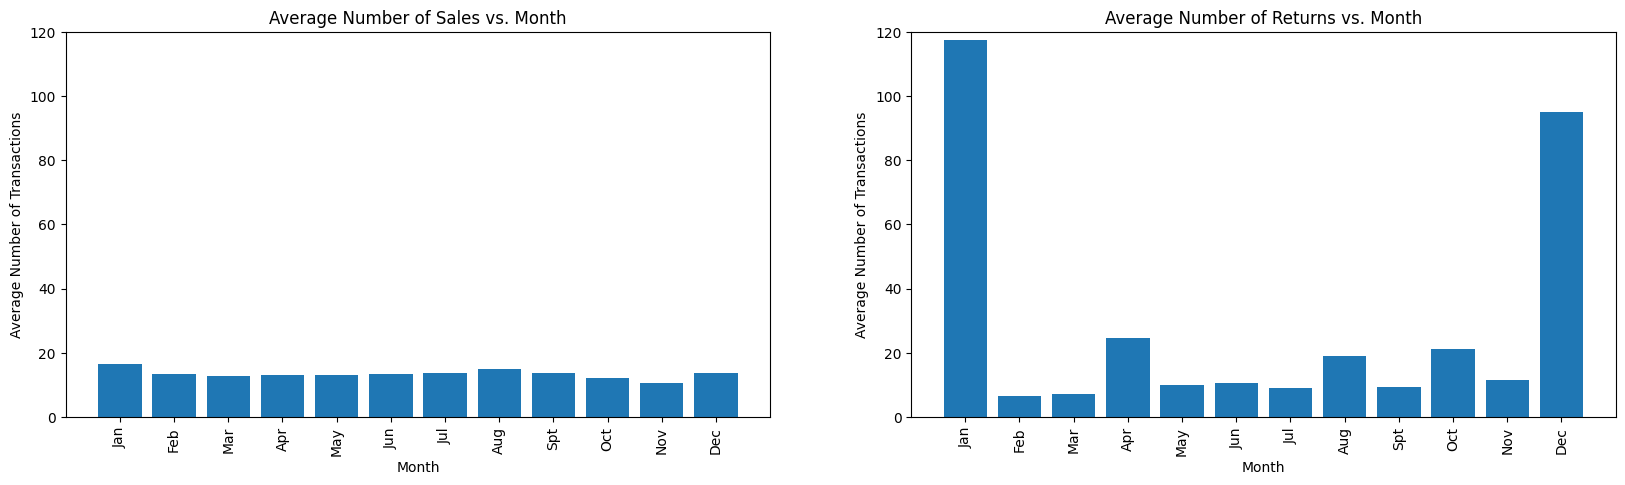

In [25]:
#Average Sales
myplotter_db(months, sales.groupby(["month"])["Quantity"].mean(), returns.groupby(["month"])["Quantity"].mean(), "Month", "Average Number of Transactions", "Average Number of Sales vs. Month", "Average Number of Returns vs. Month", -1, 12, 0, 120)

<h3>Total Value of Sales and Returns</h3>
<p>Below we can see the total dollar value (in millions of US Dollars) by month for both sles (left) and returns (right).  The number of purchases increase, as does the total value of sales, with the values of returns increasing mostly for the months of January and December.</p>

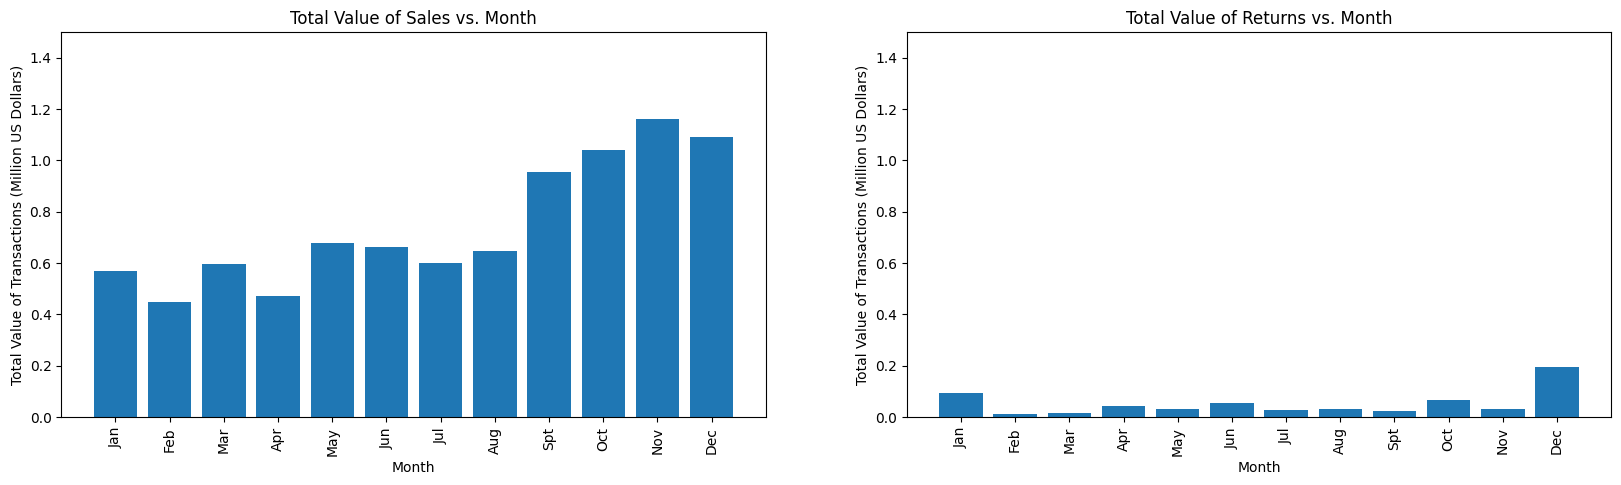

In [32]:
#Total Sales and Returns
myplotter_db(months, sales.groupby(["month"])["Value"].sum()/1000000, returns.groupby(["month"])["Value"].sum()/1000000, "Month", "Total Value of Transactions (Million US Dollars)", "Total Value of Sales vs. Month", "Total Value of Returns vs. Month", -1, 12, 0, 1.5)

<h3>Average Value of Sales and Returns by Month</h3>
<p>As with the number of sales and returns, the average value of sales does not change substantially over the course of the year, only the number of sales being made.  Similar to returns, the biggest spikes rae for January and February, though it also looks like in April and June there is an increase in the average value of the returns being made.</p>

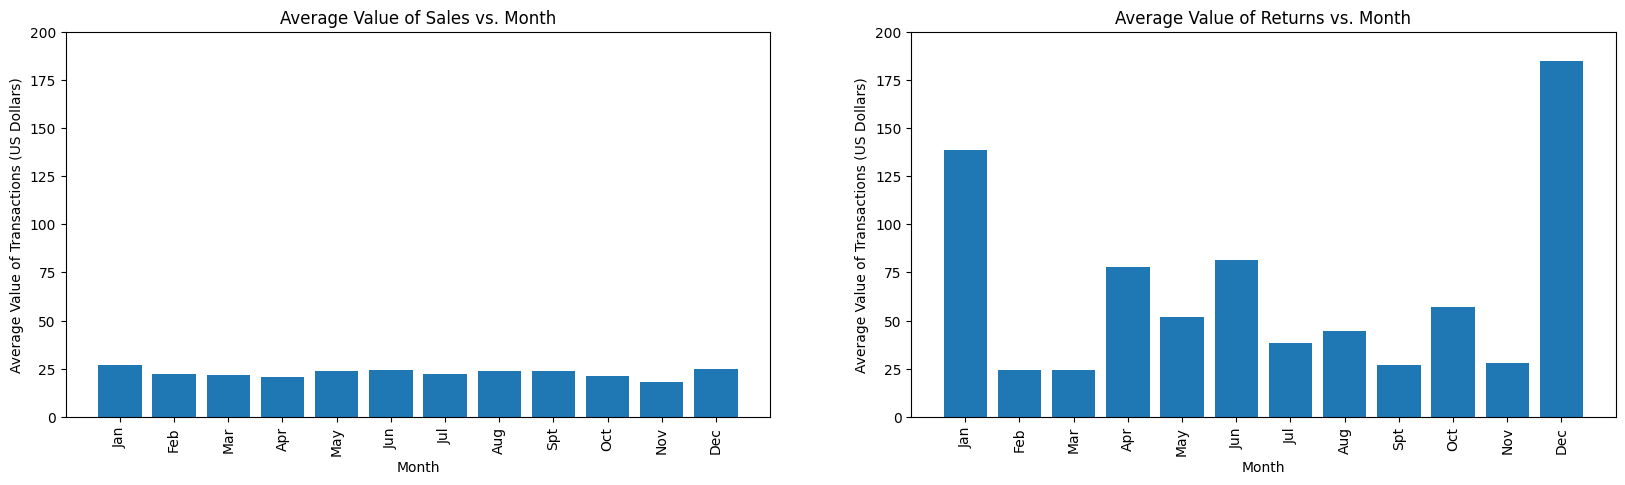

In [27]:
#Average Sales and Returns
myplotter_db(months, sales.groupby(["month"])["Value"].mean(), returns.groupby(["month"])["Value"].mean(), "Month", "Average Value of Transactions (US Dollars)", "Average Value of Sales vs. Month", "Average Value of Returns vs. Month", -1, 12, 0, 200)

<h3>Net Sales (US Dollars) vs Month</h3>
<p>Next let's consider the net sales - totals sales (dollars) minus the total returns (dollars).  November is the most profitable month for sales, with the most profit being made towards the end of the year.  Profits in December and January go down due to the number of returns made, while the profit from February to August remains fairly constant due to the lower number of sales relative towards the end of the year.</p>

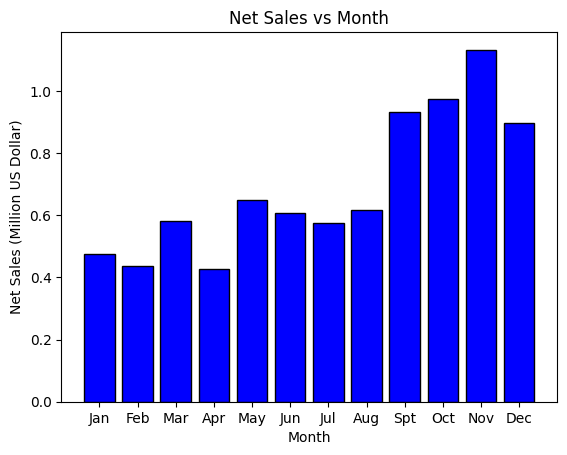

In [29]:
#Net Profit by Month
net_sales = sales.groupby(["month"])["Value"].sum() - returns.groupby(["month"])["Value"].sum()
myplotter_bar(months, net_sales/1000000, "Month", "Net Sales (Million US Dollar)", "Net Sales vs Month", -1, 12)

<h3>Average Number of Unit Sales vs Days of the Week</h3>
<p>Here we see that the earlier parts of the week are the most popular for purchases, while the returns to peak on Monday and Wednesday.</p>

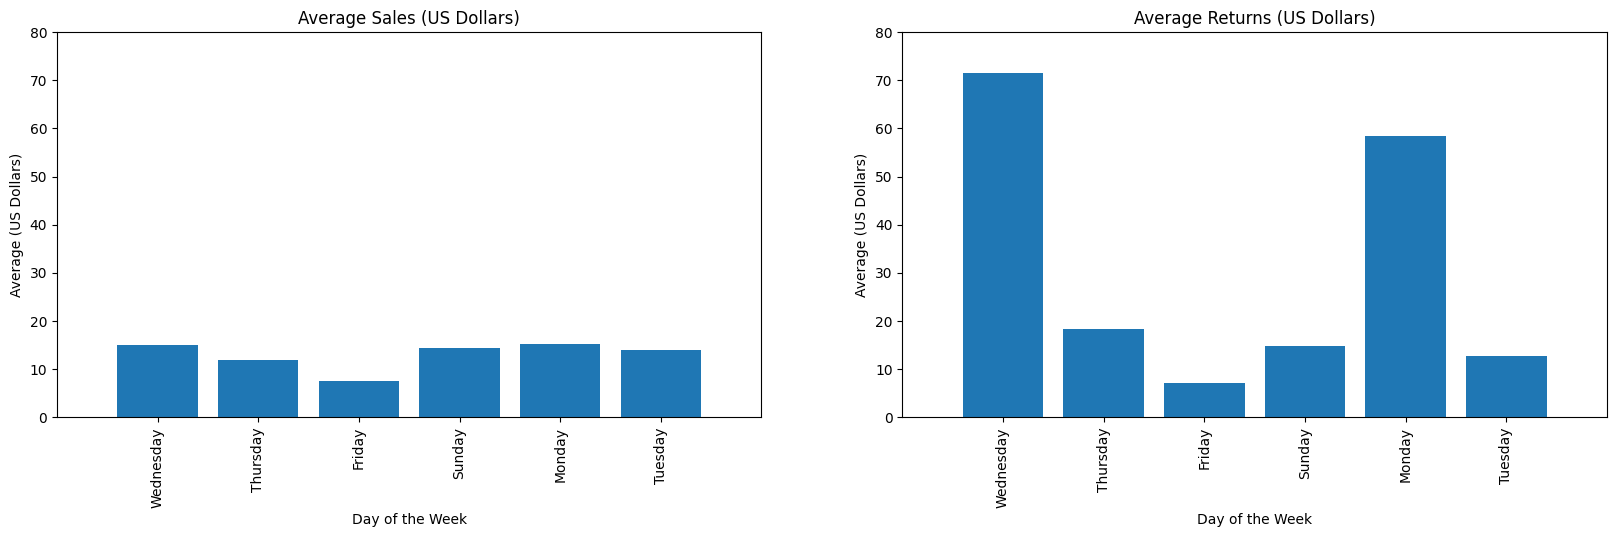

In [89]:
#sales by day of the week
myplotter_db(sales["weekday"].unique(), sales.groupby(["weekday"])["Quantity"].mean(), returns.groupby(["weekday"])["Quantity"].mean(), "Day of the Week", "Average (US Dollars)", "Average Sales (US Dollars)", "Average Returns (US Dollars)", -1, 6, 0, 80)

<h3>Sales and Returns made by Customer ID</h3>
<p>Below I've created a dataframe of the sales and returns made by customer number.</p>

In [11]:
#total numbers of transactions
total_buys = sales.groupby(["CustomerID"])["Quantity"].sum()
total_returns = returns.groupby(["CustomerID"])["Quantity"].sum()
merged_list = pd.concat([total_buys, total_returns], keys =["Purchases", "Returns"], join = "inner", axis = 1)
merged_list["Ratio"] = merged_list["Returns"] / merged_list["Purchases"]
merged_list.reset_index(inplace = True)

In [95]:
#values of transactions and their differences
value_buys = sales.groupby(["CustomerID"])["Value"].sum()
value_returns = returns.groupby(["CustomerID"])["Value"].sum()
value_list = pd.concat([value_buys, value_returns], keys =["Purchases", "Returns"], join = "inner", axis = 1)
value_list["Net"] = value_list["Purchases"] - value_list["Returns"]
value_list.reset_index(inplace = True)

<h3>Trends in purhcases and returns</h3>
<p>In general there a little correlation between the number of units a customer purchases and the number they return, and in most cases purchasers return less than 5% of what they purchased.</p>

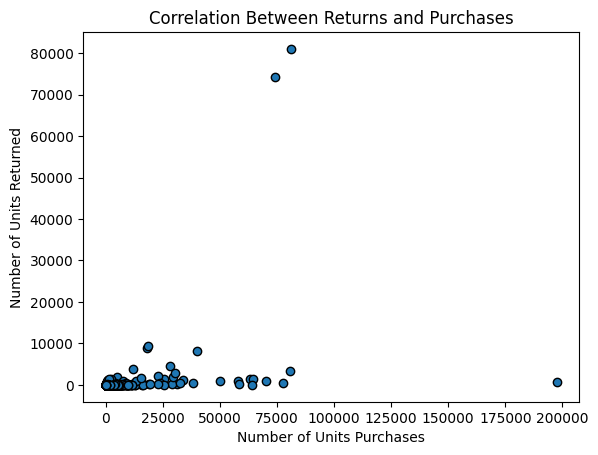

In [110]:
myplotter_scat(merged_list["Purchases"], merged_list["Returns"], "Number of Units Purchases", "Number of Units Returned", "Correlation Between Returns and Purchases")

<h3>Value of Purchases vs Returns</h3>
<p>Below is a plot of the value of purchases and returns by customer ID. In general the trends remain the same - the ones who purchase more also tend to also have a higher value of purchases, though there are definitely outliers.</p>

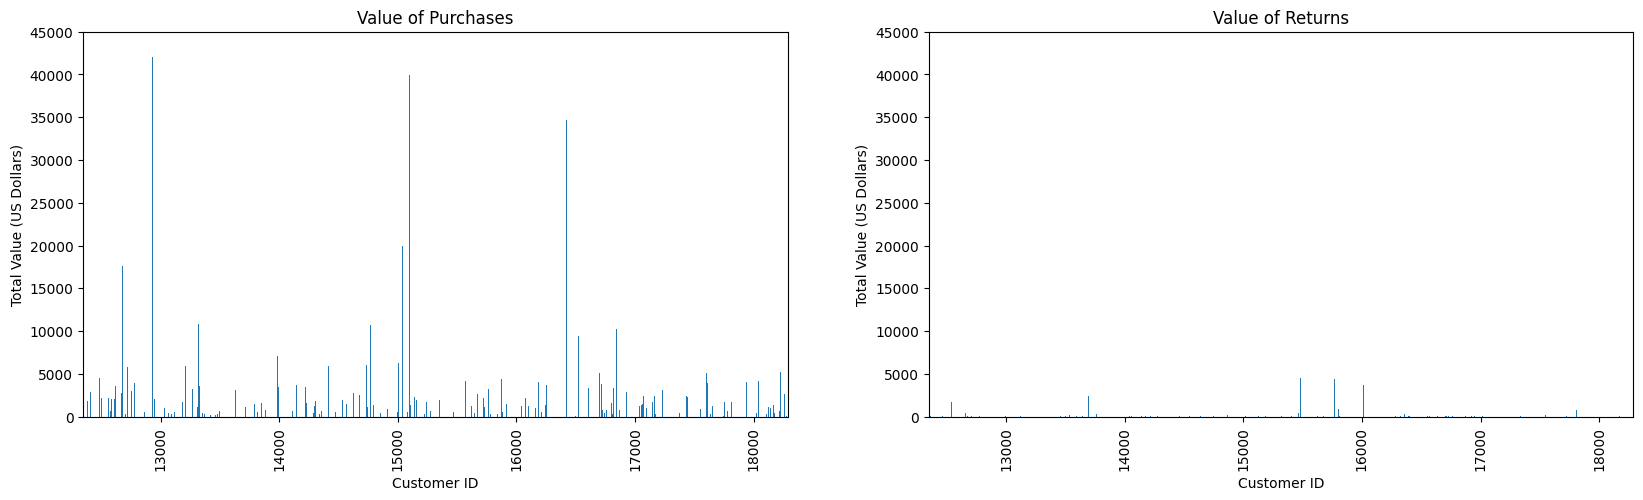

In [117]:
myplotter_db(value_list["CustomerID"], value_list["Purchases"], value_list["Returns"], "Customer ID", "Total Value (US Dollars)", "Value of Purchases", "Value of Returns", 12346, 18287, 0, 45000)

<h3>Net Value</h3>
<p>Below is a plot of the top 5 customers and what their net worth of purchases (sale value in dollars - return value in dollars) were over 2010 and 2011.</p>

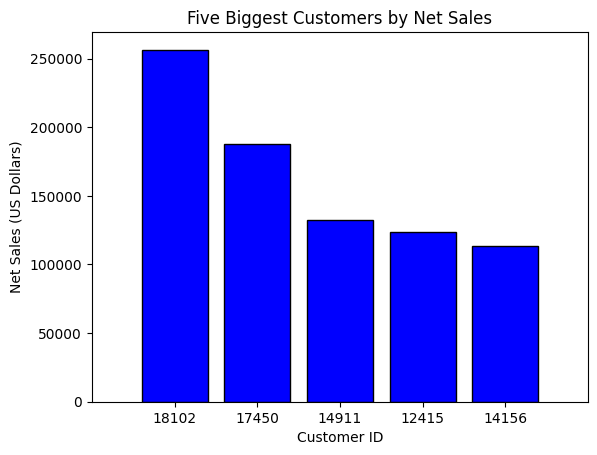

In [132]:
temp = value_list.sort_values(by = ["Net"], ascending = False)
temp.reset_index(inplace = True)
myplotter_bar(temp.loc[1:5, "CustomerID"].astype("str"), temp.loc[1:5, "Net"], "Customer ID", "Net Sales (US Dollars)", "Five Biggest Customers by Net Sales", -1, 5)

<h3>Task 6: Top Selling Products and Countries</h3>
<p>Here we look at the top 10 countries which had the top sales both by quantity and by total sales price. From these plots, it looks like Australia, France, Germany, EIRE, and the Netherlands are the largest consumers of products both by quantity and total sales dollars, with the lower top 10 being the same countries, but varrying if we focus on quantity of items purchases or the total sales.</p>

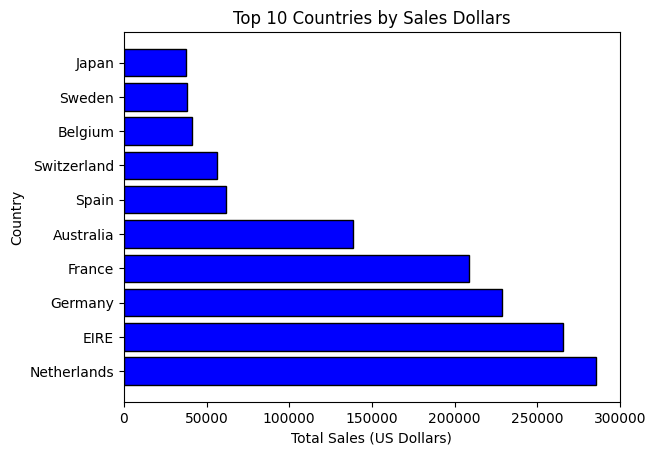

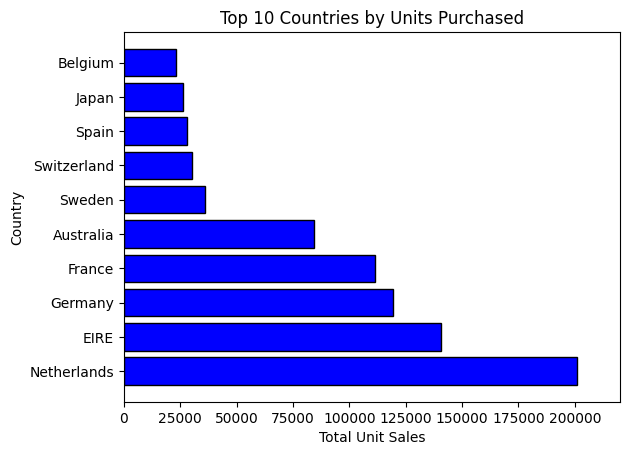

In [33]:
#setting the bounds of hte plots
ul = 0
uh = 300000
ul2 = 0
uh2 = 220000

#isolated the desired data
c_group_sales = sales.groupby(["Country"])["Quantity"].sum()
c_group_value = sales.groupby(["Country"])["Value"].sum()
q_group = pd.concat([c_group_sales, c_group_value], keys =  ["Quantity", "Sales"], join = "inner", axis = 1)
s_group = pd.concat([c_group_sales, c_group_value], keys =  ["Quantity", "Sales"], join = "inner", axis = 1)
s_group.sort_values(by = ["Sales"], ascending = False, inplace = True)
s_group.reset_index(inplace = True)
q_group.sort_values(by = ["Quantity"], ascending = False, inplace = True)
q_group.reset_index(inplace = True)

#plotting the data
myplotter_row(s_group.loc[1:10, "Country"], s_group.loc[1:10, "Sales"], "Total Sales (US Dollars)", "Country", "Top 10 Countries by Sales Dollars", ul, uh)
myplotter_row(q_group.loc[1:10, "Country"], q_group.loc[1:10, "Quantity"], "Total Unit Sales", "Country", "Top 10 Countries by Units Purchased", ul2, uh2)

<h3>Top Selling Products</h3>
<p>Below are the plots of the 10 best selling items by number of units and the total sales dollars.  By units sold, the medium ceramic jars and World War II gliders are the most popular items, but in terms of actual sale values the Regency Cake Stand (3 Tier) and white hanging heart tea-light holder are the largest sells.</p>

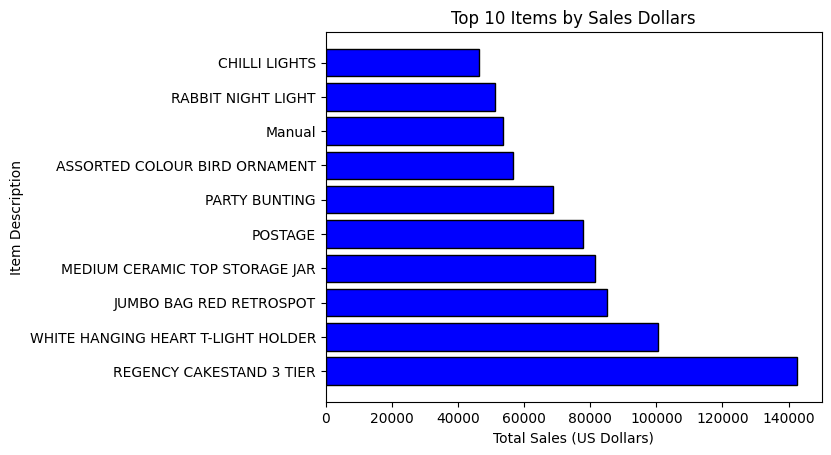

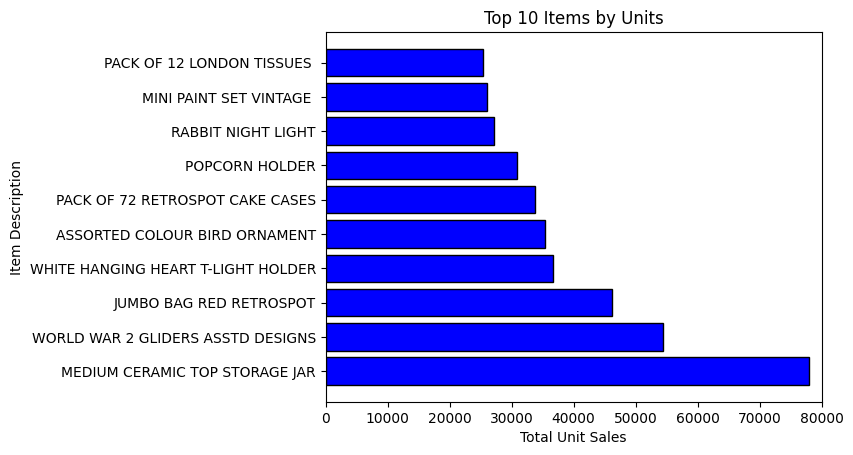

In [10]:
#setting the plot ranges
ul = 0
uh = 150000
ul2 = 0
uh2 = 80000

#
c_group_sales = sales.groupby(["Description"])["Quantity"].sum()
c_group_value = sales.groupby(["Description"])["Value"].sum()
q_group = pd.concat([c_group_sales, c_group_value], keys =  ["Quantity", "Sales"], join = "inner", axis = 1)
s_group = pd.concat([c_group_sales, c_group_value], keys =  ["Quantity", "Sales"], join = "inner", axis = 1)
s_group.sort_values(by = ["Sales"], ascending = False, inplace = True)
s_group.reset_index(inplace = True)
q_group.sort_values(by = ["Quantity"], ascending = False, inplace = True)
q_group.reset_index(inplace = True)
myplotter_row(s_group.loc[1:10, "Description"], s_group.loc[1:10, "Sales"], "Total Sales (US Dollars)", "Item Description", "Top 10 Items by Sales Dollars", ul, uh)
myplotter_row(q_group.loc[1:10, "Description"], q_group.loc[1:10, "Quantity"], "Total Unit Sales", "Item Description", "Top 10 Items by Units", ul2, uh2)

<h2>Task 7: Outlies and Anomalies</h2>

The biggest outliers are those regarding returns and purchases.  There are two data points in the 70,000 - 80,000 return values that were effectively a complete return of the order by a high-volume customer. These results make it difficult to actually see the average return rate (returns/purchases) given by customers.  A plot is shown below of the same data from above but with the outliers dropped.

In [42]:
#sorts the data from before
merged_list.sort_values(by = "Returns", ascending = False, inplace = True)
merged_list.head(10)

,CustomerID,Purchases,Returns,Ratio
1112,16446,80997,80995,0.999975
0,12346,74215,74215,1.000000
979,15838,18368,9361,0.509636
946,15749,18028,9014,0.500000
1020,16029,40208,8060,0.200458
180,12931,28004,4627,0.165226
641,14607,11766,3768,0.320245
721,14911,80515,3335,0.041421
1473,17949,30546,2975,0.097394
171,12901,23075,2160,0.093608


In [43]:
#drops the outliers
cleaned_merged_list = merged_list.drop(labels = [1112, 0, 972, 1190], axis = 0)

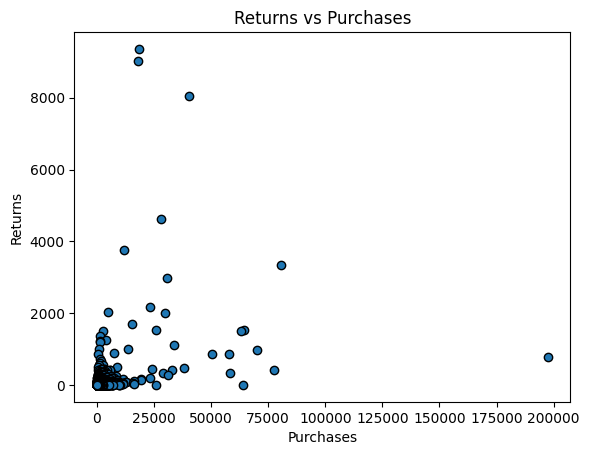

In [44]:
#plots the, cleaned data
myplotter_scat(cleaned_merged_list["Purchases"], cleaned_merged_list["Returns"], "Purchases", "Returns", "Returns vs Purchases")

<p> From this plot there doesn't seem to be much of a correlation between the number of purchases and the number of returns.  Looking at the statistics of the return/purchase ratio (Below), the average return rate was 35.7%, with the median (up to 50% of customers) returning < 1 % of the products they order.  In fact most (at least 75%) returned 2.9 % or less of the items they ordered.<p>

In [47]:
cleaned_merged_list["Ratio"].describe()

count    1552.000000
mean        0.052045
std         0.165280
min         0.000031
25%         0.004010
50%         0.010645
75%         0.028597
max         3.275862
Name: Ratio, dtype: float64

<h2>Task 8: Summary of Findings</h2>
<p>From the exploratory data analyis, I sough to identify trends in sales and return data from sales made from 2010 to 2011. Some key takeaways were:</p>
<div><ul>
<li>Most purchases were less than 1000 units, as were most returns</li>
<li>November has the most purchases and total sales, with October and December also being high volume and sales dollars.</li>
<li>December and January represented the months with the highest number of returns</li>
<li>The average number of items or value of purchases by customers remained constant througout the year, but the number of orders placed increased in October, November, and December</li>
<li>Returns show a larger variability in terms of average number and dollar value, though January and December showed the highest averages</li>
<li>In terms of net sales, November, September, October, and December showed the highest dollars of sales after adjusting for returns</li>
<li>In terms of days of the week, Sunday through Wednesday showed the strongest sales numbers, while Wednesday and Monday had the highest average number of returns</li>
<li>The five biggest customers based on dollers of purchases were customers 18102, 17450, 14911, 12415, and 14156</li>
<li>In general, the top 10 countries for sales were the same based on the materic used, with some reordering if total items or total dollars are used.  The top five are the Netherlands, EIRE, Germany, France, and Australia, while the bottom five were Japan, Sweden, Belgium, Switzerland, and Spain</li>
<li>The top selling product by items purchased was the medium cermic top storage jar, while by dollars was the regency 3-tier cakestand</li>
</ul></div> 
<p>Additionally, when outliers are removed, 75% of customers returned less than 2.9% of the products they ordered overall, with the number who returns a larger amount falling the minority of customers.</p>